## Baby boomers ageing
Visualization of the demographical "movement" through ages of the baby-boomers phenomenon in Europe.

In [2]:
# Libs & data import
import pandas as pd
import re
import io
import imageio as img
import numpy as np
import matplotlib.pyplot as plt

df_raw = pd.read_csv('data/demo_pjan.tsv', delimiter='[\t,]+')
df_raw.rename(columns={ "geo\\time": "region" }, inplace=True)

print(f'{len(df_raw)} total records read.')
print(f'Countries/regions:{df_raw.region.unique()}')

/Users/jonan/.conda/envs/py37-simple/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


17529 total records read.
Countries/regions:['AD' 'AL' 'AM' 'AT' 'AZ' 'BA' 'BE' 'BG' 'BY' 'CH' 'CY' 'CZ' 'DE' 'DE_TOT'
 'DK' 'EA18' 'EA19' 'EE' 'EEA30_2007' 'EEA31' 'EFTA' 'EL' 'ES' 'EU27_2007'
 'EU27_2020' 'EU28' 'FI' 'FR' 'FX' 'GE' 'HR' 'HU' 'IE' 'IS' 'IT' 'LI' 'LT'
 'LU' 'LV' 'MC' 'MD' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'RS' 'RU'
 'SE' 'SI' 'SK' 'SM' 'TR' 'UA' 'UK' 'XK']


### Data filtering & cleanup

Leave only the desired part of the data - region, gender, etc.
There are symbols like `e` and/or `p` in the numeric data. Clean those up, as well.

In [5]:
# Choose a region or a set of such to be used for the graphics.
REGIONS = ['EU27_2007']

# Choose gender here - 'F', 'M' or 'T' -> total. Sorry, stats is two-gendered...
SEX = 'T'

df_clean = df_raw[(df_raw.region.isin(REGIONS))
                  & (df_raw.sex == SEX)
                  & (~df_raw.age.isin(['TOTAL', 'UNK']))].copy()

df_clean.rename(columns=lambda x: x.strip(), inplace=True)

YEARS = list(filter(re.compile(r'\d+').search, df_clean.columns))
print(f'Years:{YEARS}')

for y in YEARS:
    df_clean[y] = pd.to_numeric(df_clean[y].str.replace('[^\d]+', ''), errors='coerce')

df_clean.fillna(.0, inplace=True)
df_clean = df_clean.groupby(by='age', as_index=False).sum()

# Clean the age column
df_clean.age = df_clean.age.str.replace(r'Y_?', '')
df_clean = df_clean[df_clean.age.str.isnumeric()]
df_clean.age = pd.to_numeric(df_clean.age)

df_clean.sort_values(by='age', inplace=True)
df_clean = df_clean.reset_index(drop=True)

df_clean

Years:['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971', '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963', '1962', '1961', '1960']


,age,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,1,5037194,5099349,5079469,5098572,5049528,5153428,5188922.0,5299636.0,5316177.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5137604,5109130,5137505,5080994,5179908,5219696,5317380.0,5331664.0,5385111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,5141980,5168164,5114535,5219009,5244147,5351795,5351059.0,5394254.0,5286789.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,5198152,5151040,5252134,5279610,5375443,5384196,5413283.0,5298156.0,5237756.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5176355,5277602,5306099,5413361,5407084,5448645,5315752.0,5253675.0,5165227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,343234,335240,333794,311263,236598,184790,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,96,252320,250542,237066,177609,140599,135405,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,97,185011,173547,133073,102217,100464,102342,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,98,126427,95453,74538,71164,73579,82126,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now, finally, do some plotting

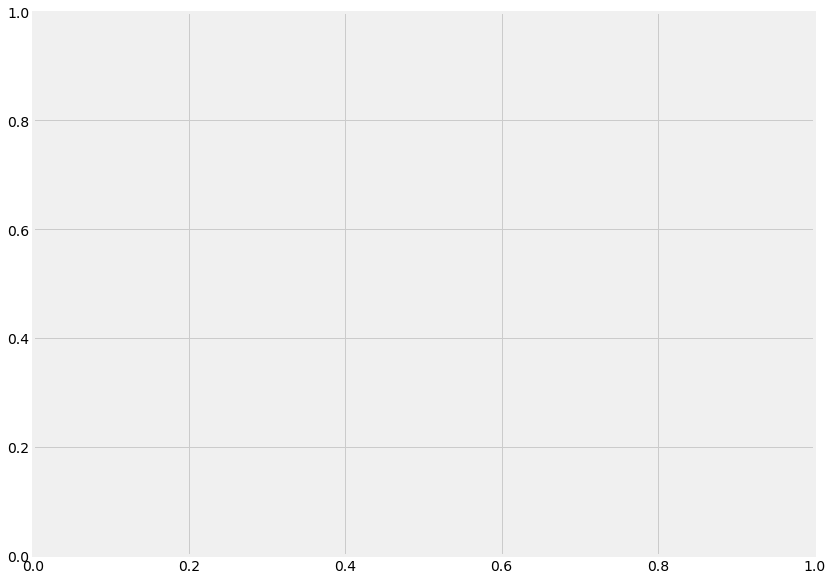

In [6]:
PLOT_RANGE = range(1993, 2020, 1)
FRACTION = 500000
MAX_POP = int(np.ceil(df_clean[YEARS].max().max() / FRACTION)) * FRACTION + 2
NUM_RANGE = range(0, MAX_POP, FRACTION)
AGE_RANGE = range(0, 100, 10)
DPI = 72

fig = plt.figure(figsize=(14,10), dpi=DPI)
plt.style.use('fivethirtyeight')

all_frames = []

for year in PLOT_RANGE:
    plt.title('%s demographics, year %d' % (','.join(REGIONS), year))
    plt.yticks(NUM_RANGE, [ '%.1fm' % (n / 1000000) for n in NUM_RANGE])
    plt.ylabel('Population')
    plt.xticks(AGE_RANGE, [ f'%dy' % n for n in AGE_RANGE])
    plt.xlabel('Age')
    plt.ylim(0, MAX_POP)
    plt.plot(df_clean[str(year)])

    io_buf = io.BytesIO()
    fig.savefig(io_buf, format='raw', dpi=DPI)
    io_buf.seek(0)
    img_arr = np.reshape(np.frombuffer(io_buf.getvalue(), dtype=np.uint8),
                         newshape=(int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
    io_buf.close()

    all_frames.append(img_arr)

    plt.cla()

# Finally, save them all!
img.mimwrite('data/aging.gif', all_frames, format='GIF-PIL', fps=2, loop=1)